In [1]:
import config
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/drojas_ciofalo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
def get_news(country):
    url = "https://newsdata2.p.rapidapi.com/news"

    headers = {
	    "X-RapidAPI-Key": config.news_api_key,
	    "X-RapidAPI-Host": "newsdata2.p.rapidapi.com"
    }

    response = requests.request("GET", url, headers=headers, params=dict(country=country))
    return response.json()

In [3]:
def create_df(data):
    df = pd.DataFrame(data["results"])
    df["content"] = df["content"].replace("’", "", regex=True)
    return df

In [21]:
def wordcloud_plot(df, stop_words, country):
    df = df.dropna(subset=["content"])
    # Concatenate the text from the column 'content'
    contents = " ".join(df["content"])

    # Create the word cloud image
    word_cloud = WordCloud(background_color='white',
                       stopwords=stop_words,
                       width=800,
                       height=400)

    # Generate the word cloud using the review data
    word_cloud.generate(contents)

    # Display the word cloud
    title = f"News from {country.upper()}"
    plt.rcParams["figure.figsize"] = (12, 8)
    plt.imshow(word_cloud, interpolation="bilinear") 
    plt.axis("off")
    plt.title(title)
    plt.savefig(f"{country}.png", dpi=150)
    plt.show()

In [5]:
def post_telegram(country):
    TOKEN = config.TG_TOKEN
    chat_id = config.chat_id
    url = f"https://api.telegram.org/bot{TOKEN}/sendPhoto?chat_id={chat_id}"
    files = {"photo": open(f"{country}.png", "rb")}
    requests.post(url, files=files)

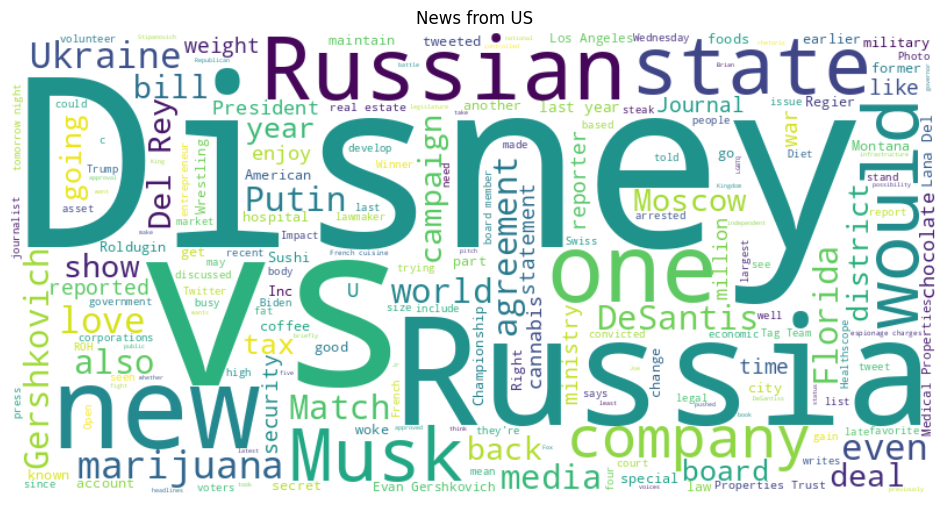

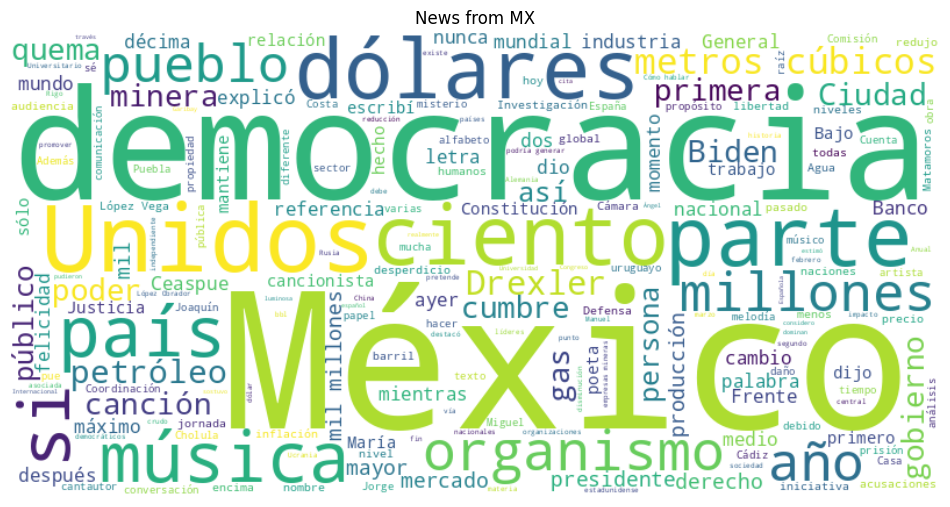

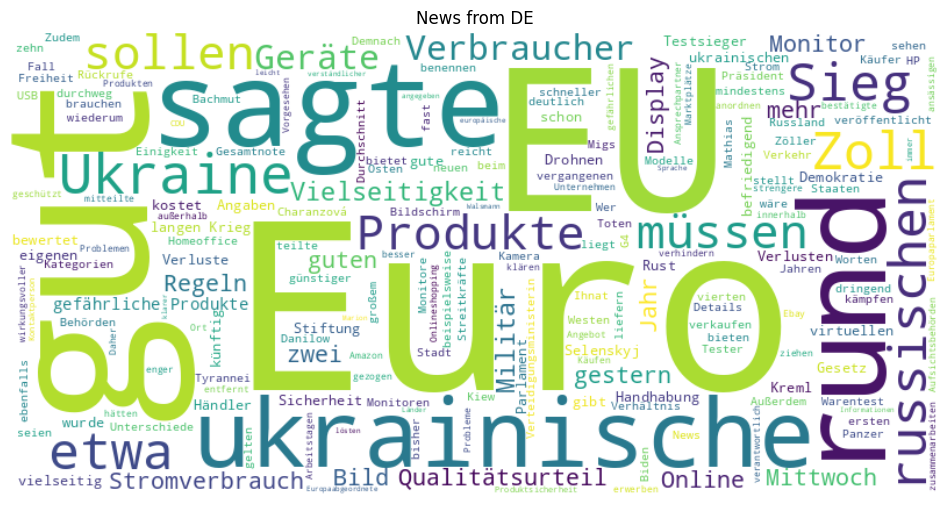

In [22]:
countries = {"us": "english", "mx": "spanish", "de": "german"}

for k, v in countries.items():
    json_data = get_news(k)
    df = create_df(json_data)
    stop_words = set(stopwords.words(v))
    stop_words.add('said')
    wordcloud_plot(df, stop_words, k)
    #post_telegram(k)

Things to do next:
* compare with another API
* prepare to submit to Github
* send plots to WA or TG writing a bot

In [23]:
df

,title,link,keywords,creator,video_url,description,content,pubDate,image_url,source_id,category,country,language
0,Mehr Kooperation mit Ebay und Co: EU verschärf...,https://www.n-tv.de/wirtschaft/EU-verschaerft-...,[keywords],None,None,"Die EU will verhindern, dass Käufer beim Onlin...","Die EU will verhindern, dass Käufer beim Onlin...",2023-03-30 15:52:26,https://bilder1.n-tv.de/img/incoming/crop24023...,n-tv,[top],[germany],german
1,Stiftung Warentest ist entzückt: Alle getestet...,https://www.n-tv.de/technik/Alle-getesteten-Mo...,[keywords],None,None,Stiftung Warentest prüft 15 Monitore mit 24 od...,Stiftung Warentest prüft 15 Monitore mit 24 od...,2023-03-30 15:50:20,https://bilder2.n-tv.de/img/incoming/crop24023...,n-tv,[top],[germany],german
2,Krieg gegen die Ukraine: So ist die Lage,https://www.nordbayern.de/politik/krieg-gegen-...,None,None,None,Kiew - Der ukrainische Staatschef wünscht sich...,Kiew - Der ukrainische Staatschef wünscht sich...,2023-03-30 12:43:47,None,nordbayern,[politics],[germany],german
3,Gläubiger stimmen für neuen Bieter beim insolv...,https://www.wort.lu/de/business/glaeubiger-sti...,None,None,None,Die zwei bisherigen Interessenten für die Über...,None,2023-03-30 12:37:01,https://blobsvc.wort.lu/picture/a039e2cbeaf3e9...,wort,[top],[germany],german
4,Nur mit Prime-Mitgliedschaft: Amazon schenkt K...,https://www.futurezone.de/entertainment/games/...,"[Games, AmazonPrime, hot]",[Dana Neumann],None,Kund*innen erwartet mit Amazon Luna ab sofort ...,None,2023-03-30 12:32:58,https://www.futurezone.de/wp-content/uploads/s...,futurezone_de,"[science, technology]",[germany],german
5,Streit um weltberühmtes Kiewer Höhlenkloster e...,https://www.wort.lu/de/international/streit-um...,None,None,None,Die ukrainische Regierung will Mönche wegen ih...,None,2023-03-30 12:30:00,https://blobsvc.wort.lu/picture/db8ed0ffb05335...,wort,[top],[germany],german
6,"Externe Festplatte, SSD und Speicherkarten im ...",https://www.nordbayern.de/ratgeber/schnaeppche...,None,[bg.nordbayern@vnp.de (Benjamin Gründken)],None,München - Eine externe Festplatte mit hoher Ka...,None,2023-03-30 12:18:25,None,nordbayern,[top],[germany],german
7,Bund und Länder einigen sich zu Hilfen für Ölh...,https://www.nordbayern.de/wirtschaft/bund-und-...,None,None,None,Berlin - Die Strom- und Gaspreisbremse ist län...,None,2023-03-30 12:15:37,None,nordbayern,[top],[germany],german
8,Gehälter der Mitarbeiter sollen besser verglei...,https://www.wort.lu/de/business/gehaelter-der-...,None,None,None,Die EU will zur Bekämpfung geschlechtsspezifis...,None,2023-03-30 12:14:58,https://blobsvc.wort.lu/picture/cb31aa12562aba...,wort,[top],[germany],german
9,Ihr Baby ist da: Aurora Ramazzotti ist Mutter ...,https://www.t-online.de/unterhaltung/stars/id_...,None,None,None,Das wird nicht nur Neu-Oma Michelle Hunziker f...,None,2023-03-30 12:14:03,https://images.t-online.de/2023/01/ULHMmCbv-hZ...,t-online,[entertainment],[germany],german
